<a href="https://colab.research.google.com/github/alin256/intro-to-ml-uis/blob/main/Clothes_MNIST_for_cource.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic classification: Classify images of clothing

##### Modifications by Sergey Alyaev @ NORCE Copyright 2021


#### Adopted from TensorFlow tutorial

##### Copyright 2018 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [ ]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

##### Links to the original tutorial:

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/keras/classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

## 0. Import the python libraries


This guide trains a neural network model to classify images of clothing, like sneakers and shirts. It's okay if you don't understand all the details; this is a fast-paced overview of a complete TensorFlow program with the details explained as you go.

This guide uses [tf.keras](https://www.tensorflow.org/guide/keras), a high-level API to build and train models in TensorFlow.


In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


## 1. Prepare the data: Import the Fashion MNIST dataset

This guide uses the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST is intended as a drop-in replacement for the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc.) in a format identical to that of the articles of clothing you'll use here.

This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and load the Fashion MNIST data directly from TensorFlow:

In [ ]:
# define where to look for the dataset 
fashion_mnist = tf.keras.datasets.fashion_mnist

# get the data
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

**Inputs:** The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. 

**Outputs:** The *labels* are an array of integers, ranging from 0 to 9 representing clothing classes:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [ ]:
class_names = ['T-shirt/top', 
               'Trouser', 
               'Pullover', 
               'Dress', 
               'Coat',
               'Sandal', 
               'Shirt', 
               'Sneaker', 
               'Bag', 
               'Ankle boot']

In [ ]:
# show the labels
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

### 1.a. Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [ ]:
train_images.shape

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [ ]:
len(train_labels)

60000

Each label is an integer between 0 and 9:

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [ ]:
test_images.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

In [ ]:
len(test_labels)

10000

### 1.b. Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

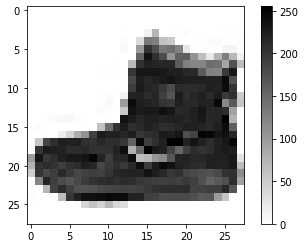

In [ ]:
plt.figure()
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. 

It's important that the *training set* and the *testing set* be preprocessed in the **same way**:

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the *training set* and display the class name below each image.

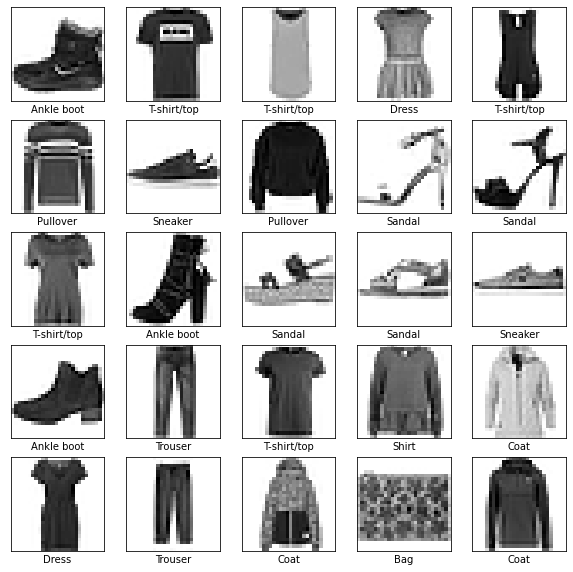

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


## 2. Define the Loss Function 




To train the model we need to choose what do we want to achieve

* *Loss function* —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.


In [ ]:
# SparseCategoricalCrossentropy means that we want the model to have probability 1 for the correct label and 0 for the others
# from_logits means that the output that our model might not be scaled not scaled to 0..1
our_loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

## 3. Build the model

Building the neural network requires 
1. configuring the layers of the model, 
2. then compiling the model.

### 3.a. Set up the layers

The basic building block of a neural network is the *layer*. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [ ]:
# we will use a sequencial model
model = tf.keras.Sequential()

# structure the input from image to a vector of numbers (define input shape)
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
# see what we got so far
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# add hidden layer with 128 neurons
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
Total params: 100,480
Trainable params: 100,480
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# add output layer with 10 outputs which are proportional to probabilities
model.add(tf.keras.layers.Dense(10))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely connected, or fully connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

### 3.b. Compile the model
Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

* Optimizer — This is how the model is updated based on the data it sees and its loss function.
* Loss - The function that tels the model to change in the weight in the correct direction
* Metrics — Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.
* Compile — make the model 'ready'

In [ ]:
model.compile(optimizer='adam',
              loss=our_loss,
              metrics=['accuracy'])

## 4. Train the model



Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.


### 4.a. Fit the model

To start training,  call the `model.fit` method—so called because it "fits" the model to the training data:

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6236 - accuracy: 0.7862
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3767 - accuracy: 0.8641
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3349 - accuracy: 0.8778
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3120 - accuracy: 0.8848
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2958 - accuracy: 0.8909
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2756 - accuracy: 0.8983
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2674 - accuracy: 0.9007
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2519 - accuracy: 0.9054
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2450 - accuracy: 0.9095
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.234

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.91 (or 91%) on the training data.

## 5. Evaluate the model

### 5.a. Evaluate accuracy on test data

Next, compare how the model performs on the test dataset:

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3423 - accuracy: 0.8826

Test accuracy: 0.8826000094413757


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents *overfitting*. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data. For more information, see the following:
*   [Demonstrate overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting)
*   [Strategies to prevent overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting)

### 5.b. Make predictions



With the model trained, you can use it to make predictions about some images.

* The model outputs unscaled probabilities [logits](https://developers.google.com/machine-learning/glossary#logits). 

* We need to attach a softmax layer to convert the logits to probabilities, which are easier to interpret. 

In [ ]:
probability_model = tf.keras.Sequential(model)
probability_model.add(tf.keras.layers.Softmax())

In [ ]:
predictions = probability_model.predict(test_images)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [ ]:
predictions[0]

array([2.22626880e-07, 4.70471923e-06, 1.08238966e-10, 3.13860049e-10,
       5.58239535e-08, 1.07002100e-02, 5.91754592e-08, 1.46063706e-02,
       2.53345684e-06, 9.74685788e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [ ]:
np.argmax(predictions[0])

9

So, the model is most confident that this image is an ankle boot, or `class_names[9]`. Examining the test label shows that this classification is correct:

In [ ]:
test_labels[0]

9

Define helper functions to graph full set of 10 class predictions.

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### 5.c. Verify predictions

With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

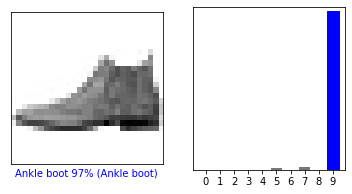

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

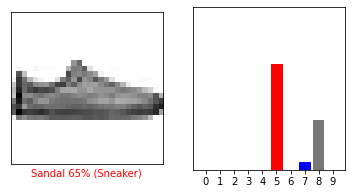

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

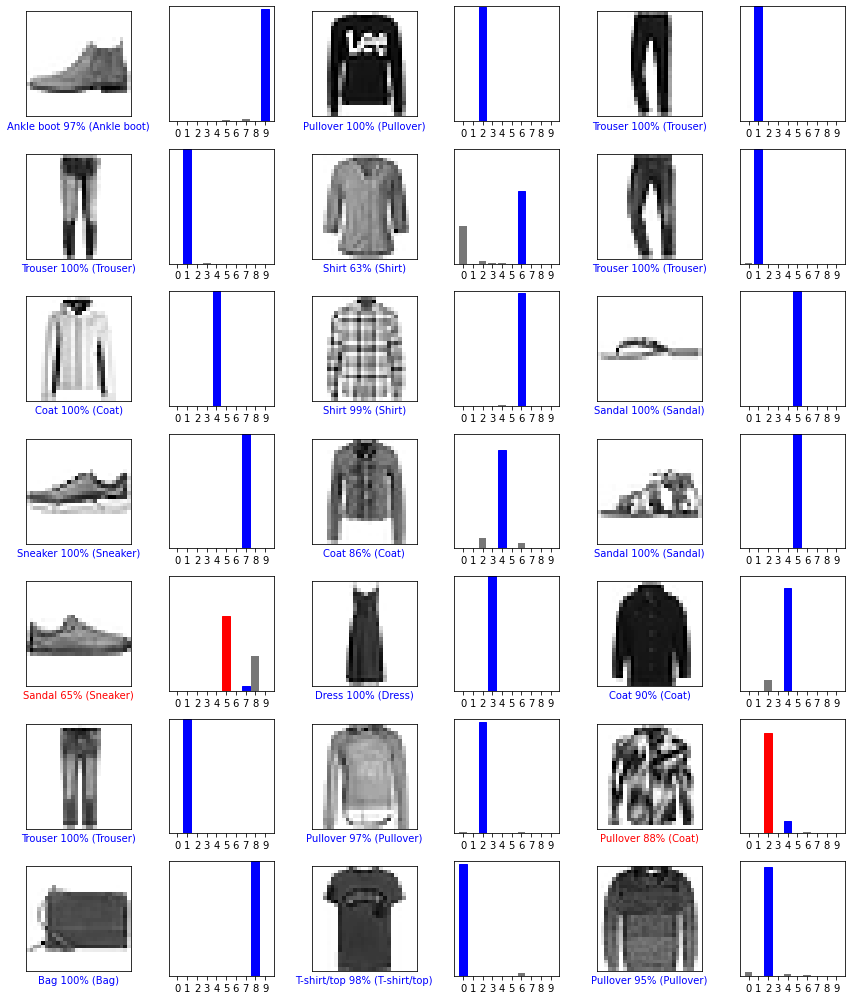

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 7
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## 6. Use the trained model

Finally, use the trained model to make a prediction about a single image.

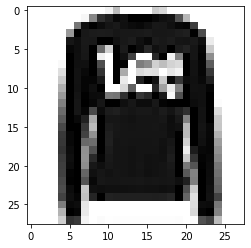

In [ ]:
# Grab an image from the test dataset.
img = test_images[1]


# make figure
plt.figure()
# plot the image
plt.imshow(img, cmap=plt.cm.binary)

In [ ]:
# shape of the image
print(img.shape)

(28, 28)


`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the correct label for this image:

In [ ]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[1.1638542e-04 1.5286356e-13 9.9775273e-01 1.7917665e-10 2.4752878e-04
  2.4785012e-07 1.8830665e-03 2.8906198e-15 6.4080656e-09 3.0314604e-14]]


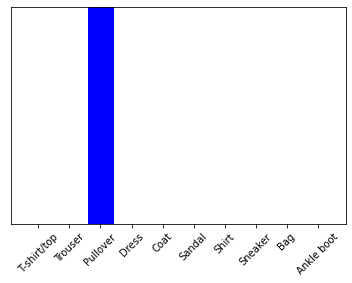

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`tf.keras.Model.predict` returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [ ]:
# Find the index 
index = np.argmax(predictions_single[0])
# Convert to human-readable form
print("This is a {}".format(class_names[index]))

This is a Pullover


And the model predicts a label as expected.

## Another: model Convolutional Neural Network


Here is the model from the previous example

In [ ]:
# we will use a sequencial model
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model1.add(tf.keras.layers.Dense(128, activation='relu')) # fully_connected with relu
model1.add(tf.keras.layers.Dense(10)) # fully_connected with linear


In [ ]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Let's create a more complex Convolutional Neural Network Model
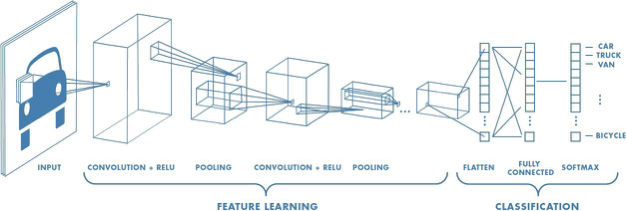

In [ ]:
# it is a sequencial model
model_cnn = tf.keras.Sequential()
# make into an image with 1 color channel
model_cnn.add(tf.keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)))
# add convolution with window of size 3x3
model_cnn.add(tf.keras.layers.Conv2D(6, (3, 3), activation='relu'))
# pulling reduces the dimension by choozing the max element in each neibourhood
model_cnn.add(tf.keras.layers.MaxPooling2D((2, 2))) 
model_cnn.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 6)         60        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 6)         0         
Total params: 60
Trainable params: 60
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# now attach a fully connected part as before
# make it flat
model_cnn.add(tf.keras.layers.Flatten())
model_cnn.add(tf.keras.layers.Dense(99, activation='relu')) # fully_connected with relu 
# I chose 99 so that the size of the model is the same
model_cnn.add(tf.keras.layers.Dense(10)) # fully_connected with linear
model_cnn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 6)         60        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 6)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1014)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 99)                100485    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1000      
Total params: 101,545
Trainable params: 101,545
Non-trainable params: 0
________________________________________________

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_cnn.compile(optimizer='adam',
              loss=our_loss,
              metrics=['accuracy'])

In [ ]:
model_cnn.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.6282 - accuracy: 0.7815
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3324 - accuracy: 0.8816
Epoch 3/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.2830 - accuracy: 0.8980
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2548 - accuracy: 0.9059
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2278 - accuracy: 0.9169
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2105 - accuracy: 0.9226
Epoch 7/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.1908 - accuracy: 0.9292
Epoch 8/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1713 - accuracy: 0.9378
Epoch 9/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1602 - accuracy: 0.9416
Epoch 10/10
1875/1875 [==============================] - 19s 10m

The accuracy of CNN on the training data is 94.3 % which is a bit better than the simple NN model with the result 91.1 %

### Making predictions

To compare the prediction on test set with the base fully-connected model, let's add the softmax layer to convert weights to probabilities.


In [ ]:
probability_model_cnn = tf.keras.Sequential(model_cnn)
probability_model_cnn.add(tf.keras.layers.Softmax())

In [ ]:
# do evaluation on test images
test_loss, test_acc_cnn = model_cnn.evaluate(test_images,  test_labels, verbose=2)

313/313 - 2s - loss: 0.2780 - accuracy: 0.9072


In [ ]:
print('\nTest accuracy, model 1: {:.2f}'.format(test_acc))
print('\nTest accuracy, CNN.   : {:.2f}'.format(test_acc_cnn))


Test accuracy, model 1: 0.88

Test accuracy, CNN.   : 0.91


In [ ]:
predictions_cnn = probability_model_cnn.predict(test_images)

### Comparing the 2 models

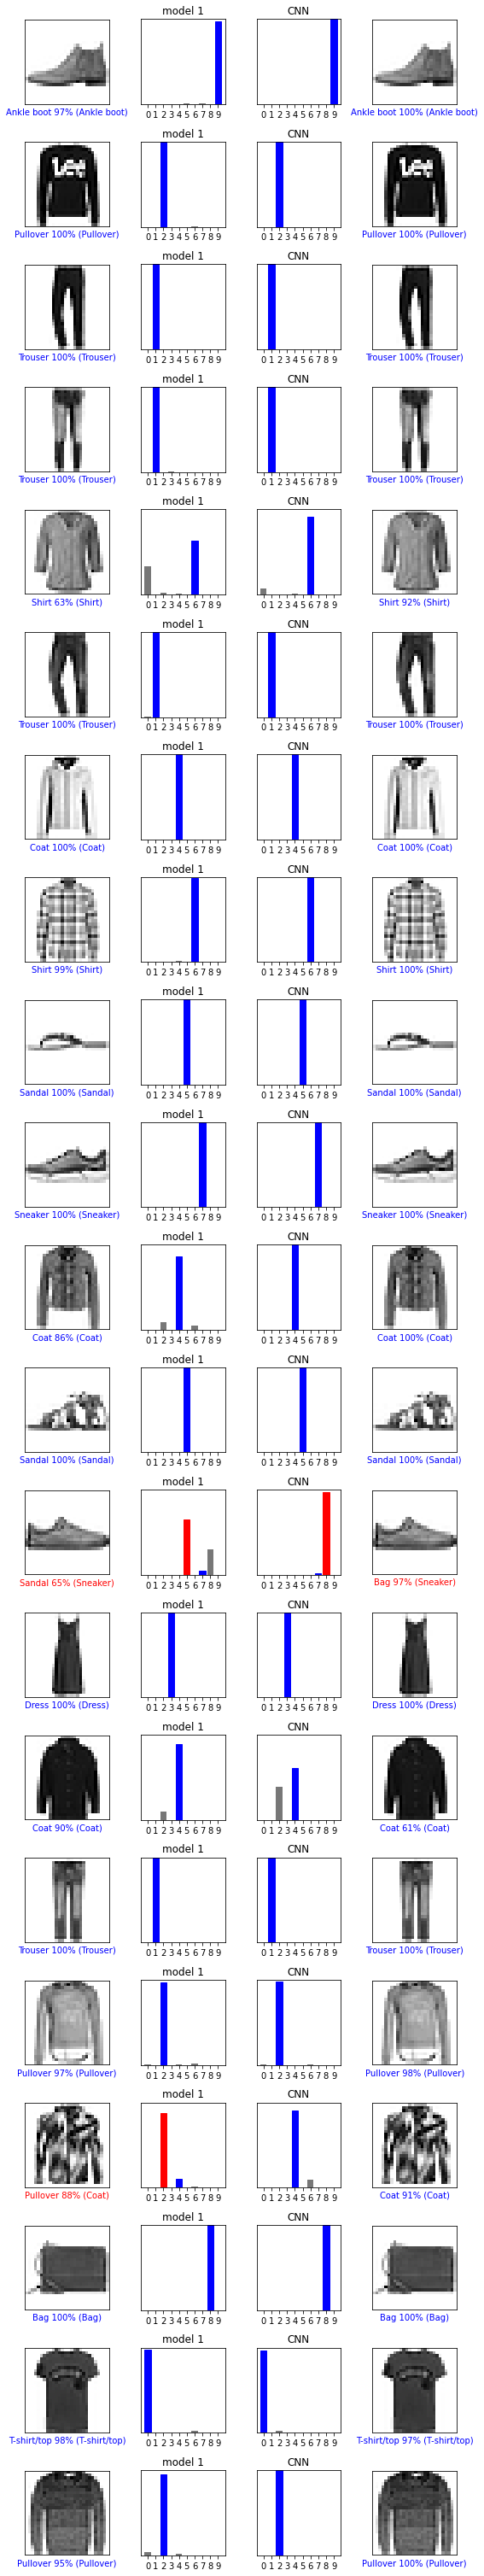

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 7 * 3
num_cols = 1
num_images = num_rows*num_cols
plt.figure(figsize=(2*4*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 4*num_cols, 4*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 4*num_cols, 4*i+2)
  plot_value_array(i, predictions[i], test_labels)
  plt.title('model 1')
  plt.subplot(num_rows, 4*num_cols, 4*i+4)
  plot_image(i, predictions_cnn[i], test_labels, test_images)
  plt.subplot(num_rows, 4*num_cols, 4*i+3)
  plot_value_array(i, predictions_cnn[i], test_labels)
  plt.title('CNN')
plt.tight_layout()
plt.show()